# Fraud Detection 

- Resample methods for imbalance data: over sampling, under sampling, SMOTE method to 
- Fraud detection using labeled data
- Performance metrics for fraud detection
- Adjusting algorithm weights
- Using ensemble methods to improve fraud detection
- Clustering methods for fraud detection (
 KMeans, and MiniBatchKMeans), Elbow curve method to judge the right amount of clusters, Assigning fraud versus non-fraud
- DBscan
- Incooperate text data into fraud detection
- Text mining to detect fraud
- Topic Modeling on Fraud: Latent Dirichlet Allocation(LDA) 
- Flagging fraud based on topics

Additional resources: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import sys
import feather
sys.path.append(r'C:\Users\Benny\fastai\old')
from fastai.imports import *
from fastai.structured import *

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
accuracy_score, log_loss, mean_squared_error, mean_absolute_error, r2_score,
 homogeneity_score, average_precision_score,precision_recall_curve, silhouette_score)
from sklearn.model_selection import (RandomizedSearchCV, GridSearchCV, 
TimeSeriesSplit, KFold, train_test_split)


In [107]:
df = pd.read_csv('fraud/creditcard_sampledata_ch1_3.csv')
df = df.drop(df.columns[0],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


check for imbalance class

In [7]:
occ = df['Class'].value_counts()
print(occ/occ.sum())

0    0.990099
1    0.009901
Name: Class, dtype: float64


In [17]:
df2 = pd.read_csv('fraud/creditcard_sampledata_ch1.csv')
df2.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


In [2]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 1], X[y == 0, 2], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 1], X[y == 1, 2], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    plt.show()


visualizing the classes 

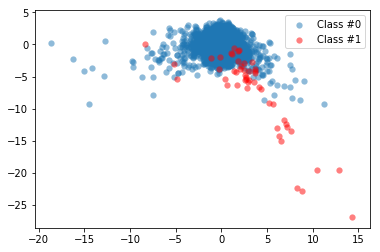

In [31]:
# Create X and y from the prep_data function 
X, y, nas = proc_df(df,y_fld='Class')
X = X.values

# Plot our data by running our plot data function on X and y
plot_data(X, y)

In [32]:
def prep_data(df):
    # Create X and y from the prep_data function 
    X, y, nas = proc_df(df,y_fld='Class')
    X = X.values
    return X, y
    

# Data Resampling
- Random Over Sampling
- Random Under Sampling
- Synthesis Minority Over-sampling Technique(SMOTE)


Re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data.


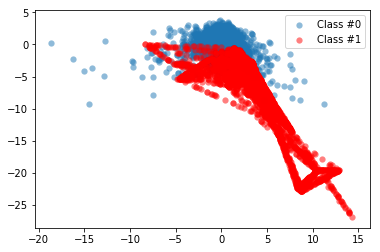

In [33]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

Compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. 

In [35]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

0    5000
1      50
dtype: int64
1    5000
0    5000
dtype: int64


In [69]:
def compare_plot(X, y, X_resampled, y_resampled, method='SMOTE'):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.scatter(X[y == 0, 1], X[y == 0, 2], label="Class #0", alpha=0.5, linewidth=0.15)
    ax1.scatter(X[y == 1, 1], X[y == 1, 2], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    ax1.legend()
    ax1.set_title('Original Set')
    
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(X_resampled[ y_resampled == 0, 1], X_resampled[ y_resampled == 0, 2], label="Class #0", alpha=0.5, linewidth=0.15)
    ax2.scatter(X_resampled[ y_resampled == 1, 1], X_resampled[ y_resampled == 1, 2], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    ax2.legend()
    ax2.set_title(method)
    

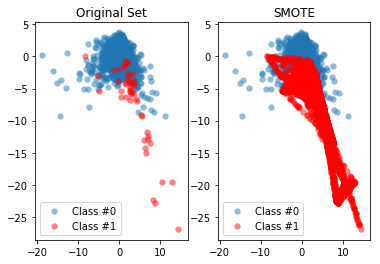

In [70]:
# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

**Exploring the traditional way to catch fraud**

In this exercise you're going to try finding fraud cases in our credit card dataset the "old way". First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.

In [71]:
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1']<-3,df['V3']<-5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


Compare the performance to ML classification 

In [78]:
X, y = prep_data(df)

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.89      0.80      0.84        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


Remember the data is split, thus the data in the confusion matrix is only 0.3 of the total data. 

The result has less false positives.

## Logistic regression combined with SMOTE pipline

Logistic regression combined with SMOTE
In this exercise, you're going to take the Logistic Regression model from the previous exercise, and combine that with a SMOTE resampling method.

In [79]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [80]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.62      1.00      0.77        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.81      1.00      0.88      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1499    6]
 [   0   10]]


The SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives, albeit only 7 cases. Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

# Fraud detection using labelled data

In [85]:
df = pd.read_csv('fraud/creditcard_sampledata_2.csv')
df = df.drop(df.columns[0:2],axis=1)
df.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,-0.679089,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,0.279973,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,-0.188235,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,0.017562,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,-1.967998,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [86]:
X, y = prep_data(df)

use credit card transaction data. The features and labels are similar to the data in the previous chapter, and the data is heavily imbalanced. We've given you features X and labels y to work with already, which are both numpy arrays.

First you need to explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. In the following exercises, you'll create our first random forest classifier for fraud detection. That will serve as the "baseline" model that you're going to try to improve in the upcoming exercises.

In [87]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

95.8904109589041


## Random Forest Classifier

In [89]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9904109589041096


**Performance metrics for the RF model**

In the previous exercises you obtained an accuracy score for your random forest model. This time, we know accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly.

In [90]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9338879319822626
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.96      0.80      0.87        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.90      0.93      2190
weighted avg       0.99      0.99      0.99      2190

[[2096    3]
 [  18   73]]


The model predicts 76 cases of fraud, out of which 73 are actual fraud. You have only 3 false positives. This is really good, and as a result you have a very high precision score. You do however, don't catch 18 cases of actual fraud. Recall is therefore not as good as precision.


**Plotting the Precision Recall Curve**

You can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

In [94]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

Text(0, 0.5, 'precision')

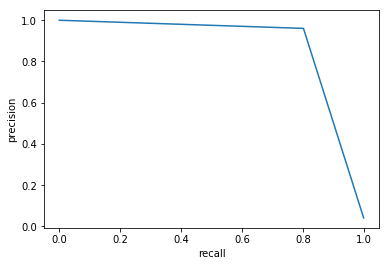

In [97]:
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')

# Adjusting algorithm weights

- Adjust the model weight in ski-learn to get the best precision and recall
- class_weights = 'balanced' adjust the weights inversely proportional to class frequencies
- for 'balanced_subsample' weight is calculated again at each iteration of growing a tree (only for RF) 
- or use manual weight for example class_weight = {0:1, 1:4} 
- it is a bit of a blunt force mechanism and might not work for your very special case

In [98]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9347962661445273
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.79      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  19   72]]


the model results don't improve drastically. We now have 3 less false positives, but now 19 in stead of 18 false negatives, i.e. cases of fraud we are not catching. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try. 

In [99]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
# Change depth of model
max_depth=10, # Change the number of samples in leaf nodes
            min_samples_leaf=10, 

			# Change the number of trees to use
            n_estimators=20, n_jobs=-1, random_state=5)

In [110]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    #probs = model.predict_proba(X_test)

    # Print the roc_auc_score, the classification report and confusion matrix
    #print(roc_auc_score(y_test, probs[:,1]))
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))

In [101]:
# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

0.9609651901219315
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.97      0.85      0.91        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190

[[2097    2]
 [  14   77]]


by smartly defining more options in the model, you can obtain better predictions. You have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low. In this exercise you've manually changed the options of the model. There is a smarter way of doing it, by using GridSearchCV


**GridSearchCV to find optimal parameters** 

In this exercise you're going to tweak our model in a less "random" way, but use GridSearchCV to do the work for you.

With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, you can optimize your model settings to get the best possible Recall score. If you also cared about reducing the number of false positives, you could optimize on F1-score, this gives you that nice Precision-Recall trade-off.

In [102]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1,30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

In [103]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

0.9749697658225529
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.95      0.84      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2095    4]
 [  15   76]]


# Using ensemble methods to improve fraud detection

- Bagging means train the model on subsample of your data and aggregate the result by taking the average prediction 
- Stacking means multiple models are combined via a voting rule on the model outcome. Each model is allowed to see the whole training set. 
- Use VotingClassifier in sk-learn to include multiple classifiers
- voting rule : voting='hard' means want a majority vote , voting='soft' use probability 
- weights = [2,1,1] means weights for each classifier 


**Combine three algorithms into one model with the VotingClassifier**


In [104]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9722054981702433
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2099
           1       0.63      0.88      0.73        91

   micro avg       0.97      0.97      0.97      2190
   macro avg       0.81      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190

[[2052   47]
 [  11   80]]


In [111]:
# Import the package
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.90      0.86      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2090    9]
 [  13   78]]


**Adjust weights within the Voting Classifier** 

You've just seen that the Voting Classifier allows you to improve your fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights you can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

In [112]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.85      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2094    5]
 [  14   77]]


# Unsupervised Learning for Fraud Detection

- Need to distinguish normal from abnormal behavior without labels 
- Abnormal behavior is not always fraudulent 
- abnormal behavior for one type of client may not be normal for another, thus need to segment the clients into groups first and detect abnormal behavior within segments 


you will be looking at bank payment transaction data. The financial transactions are categorized by type of expense, as well as the amount spent. Moreover, you have some client characteristics available such as age group and gender. Some of the transactions are labelled as fraud; you'll treat these labels as given and will use those to validate the results.

When using unsupervised learning techniques for fraud detection, you want to distinguish normal from abnormal (thus potentially fraudulent) behavior. As a fraud analyst to understand what is "normal", you need to have a good understanding of the data and its characteristics

In [115]:
bank = pd.read_csv('fraud/banksim.csv')
bank = bank.drop(bank.columns[0],axis=1)
bank.head()

,age,gender,category,amount,fraud
0,3,F,es_transportation,49.71,0
1,4,F,es_health,39.29,0
2,3,F,es_transportation,18.76,0
3,4,M,es_transportation,13.95,0
4,2,M,es_transportation,49.87,0


Customer segmentation
In this exercise you're going to check whether there are any obvious patterns for the clients in this data, thus whether you need to segment your data into groups, or whether the data is rather homogenous.

In [118]:
# Groupby categories and take the mean
print(bank.groupby('category').mean())
# Group by age groups and get the mean
print(bank.groupby('age').mean())

                           amount     fraud
category                                   
es_barsandrestaurants   43.841793  0.022472
es_contents             55.170000  0.000000
es_fashion              59.780769  0.020619
es_food                 35.216050  0.000000
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_hotelservices       172.756245  0.548387
es_hyper                46.788180  0.125000
es_leisure             229.757600  1.000000
es_otherservices       149.648960  0.600000
es_sportsandtoys       157.251737  0.657895
es_tech                132.852862  0.179487
es_transportation       27.422014  0.000000
es_travel              231.818656  0.944444
es_wellnessandbeauty    66.167078  0.060606
        amount     fraud
age                     
0    49.468935  0.050000
1    35.622829  0.026648
2    37.228665  0.028718
3    37.279338  0.023283
4    36.197985  0.035966
5    37.547521  0.023990
6    36.700852  0.022293
U    39.117000  0.000000


 - the majority of fraud is observed in travel, leisure and sports related transactions
 - does not make sense to segment data by age because the age groups who are the largest are relatively similar. Age group '0' stands out but since there are only 40 cases, it does not make sense to split these out in a separate group and run a separate model on them.

** Using statistics to define normal behavior **

In the previous exercises we saw that fraud is more prevalent in certain transaction categories, but that there is no obvious way to segment our data into for example age groups. This time, let's investigate the average amounts spend in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.

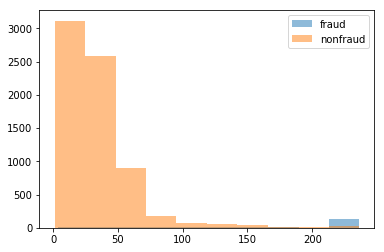

In [119]:
# Create two dataframes with fraud and non-fraud data 
bank_fraud = bank.loc[bank.fraud == 1] 
bank_non_fraud = bank.loc[bank.fraud == 0] 

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(bank_fraud.amount, alpha=0.5, label='fraud')
plt.hist(bank_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

As the number fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, you can see that the fraudulent transactions tend to be on the larger side relative to normal obervations. This is good news, as it helps us later in detecting fraud from non-fraud.

## Clustering methods to detect fraud: K-Means 

- need to specified the number of clusters 
- Need to scale the data before clustering : MinMaxScaler()
- Use Elbow curve or Silhouette method to judge the right amount of clusters

In [121]:
bank = pd.read_csv('fraud/banksim_adj.csv')
bank = bank.drop(bank.columns[0],axis=1)
bank.head()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Scaling the data**


For ML algorithms using distance based metrics, it is crucial to always scale your data, as features using different scales will distort your results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore you first need to scale your data before continuing to implement the algorithm. Let's do that first.

In [133]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Transform df into a numpy array
X = np.array(bank.drop('fraud',axis=1)).astype(np.float)
y = bank.fraud.values

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**K-means clustering**

A very commonly used clustering algorithm is K-means clustering. For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. However, fraud data is oftentimes very large, especially when you are working with transaction data. MiniBatch K-means is an efficient way to implement K-means on a large dataset, which you will use in this exercise.

In [134]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [135]:
bank.shape

(7189, 18)

**Elbow method**

In the previous exercise you've implemented MiniBatch K-means with 8 clusters, without actually checking what the right amount of clusters should be. For our first fraud detection approach, it is important to get the number of clusters right, especially when you want to use the outliers of those clusters as fraud predictions. To decide which amount of clusters you're going to use, let's apply the Elbow method and see what the optimal number of clusters should be based on this method.

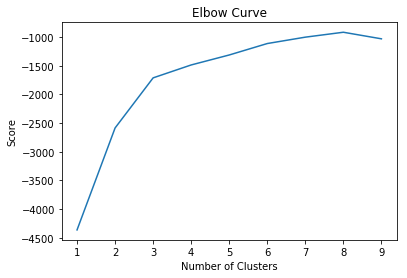

In [136]:
#Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Assigning fraud versus non-fraud after obtaining the cluster 

- Use the cluster centroid
- Assign each data point to its cluster
- calculate the distance of each point in the dataset to their own cluster centroid 
- Need to find the cut-off point for the distances EX 95 percentile  
- Analyze the result to understand why the data points are flagged

**Detecting outliers**

In the next exercises, you're going to use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to sense check our results.

The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. You'll learn how to do this and how to determine the cut-off in this exercise. In the next one, you'll check the results.


In [137]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_

dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

**Checking model results**

0.8109115999408585


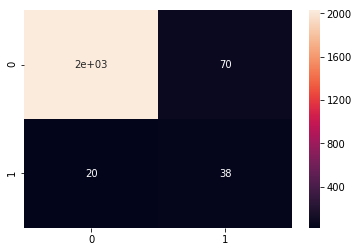

In [146]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test,km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
sns.heatmap(km_cm,annot=True)

## Other ways to flag fraud: DBScan

- K-means works well when data is clustered in normal, round shapes, but not well when data is clustered in very different shapes 
- Instead of outliers, one can use the smallest clusters as indication of fraud. This method works if the fraud behaviors are clustered

**DBScan** 

- do not need to predefine the number of cluster 
- Good for a fraud with small cluster 
- Need to give maximum allowed distance between data and minimum amount of samples in clusters (eps)
- better performance on weirdly shaped data (min_samples) 
- High computational costs 
- performance metric:use silhouette_score 
- number of samples in each cluster is used to decide which cases are flags as fraud.

In this exercise you're going to explore using a density based clustering method (DBSCAN) to detect fraud. The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. This time, you are not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as fraud. 

In [140]:
X_test_clusters_centers.shape

(3, 17)

In [161]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
# return -1 for noise 
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(y, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 23
Homogeneity: 0.612
Silhouette Coefficient: 0.713


 The number of clusters is much higher than with K-means. For fraud detection this is for now OK, as we are only interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and decide which one to flag as fraud.
 
 
**Assessing smallest clusters**
In this exercise you're going to have a look at the clusters that came out of DBscan, and flag certain clusters as fraud:

- need to figure out how big the clusters are, and filter out the smallest
- take the smallest ones and flag those as fraud
- check with the original labels whether this does actually do a good job in detecting fraud.

In [159]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  145 2714   55  174  119  122   98   54   15   76   15   43   25   51   47   42   15   25   20   19
   10]


In [160]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[21 17  9]


In [162]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

Their counts are:
[10 15 15]


So now we know which smallest clusters you could flag as fraud. If you were to take more of the smallest clusters, you cast your net wider and catch more fraud, but most likely also more false positives.


**Checking results**

In this exercise you're going to check the results of your DBscan fraud detection model. In reality, you often don't have reliable labels and this where a fraud analyst can help you validate the results. He/She can check your results and see whether the cases you flagged are indeed suspicious. You can also check historically known cases of fraud and see whether your model flags them.

In [164]:
# Create a dataframe of the predicted cluster numbers and fraud labels
df = pd.DataFrame({'clusternr':pred_labels,'fraud':y})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21) | (df['clusternr']==17) | (df['clusternr']==9), 1, 0)

# Run a crosstab on the results 
print(pd.crosstab(df.fraud, df.predicted_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6973  16
1               176  24


The good thing is: our of all flagged cases, roughly 2/3 are actually fraud! Since you only take the three smallest clusters, by definition you flag less cases of fraud, so you catch less but also have less false positives. However, you are missing quite a lot of fraud cases. Increasing the amount of smallest clusters you flag could improve that, at the cost of more false positives of course.

# Incooperate text data into fraud detection
- Word search: use this word search as an additional flag, or as a feauture in your fraud detection model 
- Sentiment analysis 
- Word frequencies and topic analysis 
- Style 

**Word search with dataframes**

In this exercise you're going to work with text data, containing emails from Enron employees. The Enron scandal is a famous fraud case. Enron employees covered up the bad financial position of the company, thereby keeping the stock price artificially high. Enron employees sold their own stock options, and when the truth came out, Enron investors were left with nothing. The goal is to find all emails that mention specific words, such as "sell enron stock".

In [20]:
df = pd.read_csv('fraud/enron_emails_clean.csv').dropna()

In [21]:
# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)
# Select the data from df using the mask
print(df.loc[mask])

                                       Message-ID                        From  \
154  <6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')   

                             To                 Date  \
154  ('sarah.palmer@enron.com')  2002-02-01 14:53:35   

                                               content  \
154  \nJoint Venture: A 1997 Enron Meeting Belies O...   

                                         clean_content  
154  joint venture enron meeting belies officers cl...  


**Using list of terms** 

Oftentimes you don't want to search on just one term. You probably can create a full "fraud dictionary" of terms that could potentially flag fraudulent clients and/or transactions. Fraud analysts often will have an idea what should be in such a dictionary. In this exercise you're going to flag a multitude of terms, and in the next exercise you'll create a new flag variable out of it. The 'flag' can be used either directly in a machine learning model as a feature, or as an additional filter on top of your machine learning model results. Let's first use a list of terms to filter our data on.

In [4]:
# Create a list of terms to search for
searchfor = [ 'enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
print(filtered_emails)

                                         Message-ID  \
0      <8345058.1075840404046.JavaMail.evans@thyme>   
1      <1512159.1075863666797.JavaMail.evans@thyme>   
2     <26118676.1075862176383.JavaMail.evans@thyme>   
3     <10369289.1075860831062.JavaMail.evans@thyme>   
4     <26728895.1075860815046.JavaMail.evans@thyme>   
5     <24716667.1075860824904.JavaMail.evans@thyme>   
6     <33107398.1075861369659.JavaMail.evans@thyme>   
7     <26091852.1075860822907.JavaMail.evans@thyme>   
8     <19319259.1075862176360.JavaMail.evans@thyme>   
9      <6656919.1075860824395.JavaMail.evans@thyme>   
10    <18830843.1075860818403.JavaMail.evans@thyme>   
11    <28795989.1075852092444.JavaMail.evans@thyme>   
12    <17859589.1075862385936.JavaMail.evans@thyme>   
13     <8415659.1075860990190.JavaMail.evans@thyme>   
14    <15501472.1075861214988.JavaMail.evans@thyme>   
15    <15184740.1075860835623.JavaMail.evans@thyme>   
16     <1678648.1075842053524.JavaMail.evans@thyme>   
17    <307

[314 rows x 6 columns]


**Creating a flag**

This time you are going to create an actual flag variable that gives a 1 when the emails get a hit on the search terms of interest, and 0 otherwise. This is the last step you need to make in order to actually use the text data content as a feature in a machine learning model, or as an actual flag on top of model results

In [22]:
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

0    1772
1     314
Name: flag, dtype: int64


## Text mining to detect fraud

Cleaning your text data procedure:
1. Tokenization: split text into sentences and sentences into words, split the text into sentences and into words. Make every lowercase and remove punctuation 
2. Remove all stop words 
3. Lemmatize words: change words from third person into first person, change verbs into present tenses 
4. Stem the words, EX: walking, walked are reduced to walk

Removing stopwords
In the following exercises you're going to clean the Enron emails, in order to be able to use the data in a topic model. Text cleaning can be challenging, so you'll learn some steps to do this well. 

-  define the list of stopwords and punctuations that are to be removed
- "lemmatization" of words, and stemming the verbs
- clean our enron emails in the dataframe df

In [9]:
# Import nltk packages and string 
from nltk.corpus import stopwords
import string

# Define stopwords to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

In [7]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    ''' function: Strip the words from whitespaces using rstrip, 
    and exclude stopwords and punctuations. 
    Finally lemmatize the words and assign that to normalized    '''
    text = text.rstrip()
    # Remove stopwords
    stop_free = " ".join([word for word in text.lower().split() if ((word not in stop) and (not word.isdigit()))])
    # Remove punctuations
    punc_free = ''.join(word for word in stop_free if word not in exclude) 
    # Lemmatize all words
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())      
    return normalized

In [23]:
# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content'].values:
    text_clean.append(clean(text, stop).split()) 

In [24]:
print(text_clean[:5])

[['investools', 'advisory', 'free', 'digest', 'trusted', 'investment', 'advice', 'unsubscribe', 'free', 'newsletter', 'please', 'see', 'issue', 'fried', 'sell', 'stock', 'gain', 'month', 'km', 'rowe', 'january', 'index', 'confirms', 'bull', 'market', 'aloy', 'small', 'cap', 'advisor', 'earns', 'lbix', 'compounding', 'return', 'pine', 'tree', 'pcl', 'undervalued', 'high', 'yield', 'bank', 'put', 'customer', 'first', 'aso', 'word', 'sponsor', 'top', 'wall', 'street', 'watcher', 'ben', 'zacks', 'year', 'year', 'gain', 'moving', 'best', 'brightest', 'wall', 'street', 'big', 'money', 'machine', 'earned', 'ben', 'zacks', 'five', 'year', 'average', 'annual', 'gain', 'start', 'outperforming', 'long', 'term', 'get', 'zacks', 'latest', 'stock', 'buylist', 'free', 'day', 'trial', 'investools', 'c', 'go', 'zaks', 'mtxtu', 'zakstb', 'investools', 'advisory', 'john', 'brobst', 'investools', 'fried', 'sell', 'stock', 'lock', 'month', 'km', 'david', 'fried', 'know', 'stock', 'undervalued', 'company', 

# Topic Modeling on Fraud

- Topic modeling discovers hidden patterns in text data
- What the text is about based on the words it contains 
- Similar to clustering data 
- If we have labels we can compare topics of fraud cases to non-fraud cases and use as a feature of flag.
- Without label, we can ask is there a particular topic in the data that seems to point to fraud?

Latent Dirichlet Allocation(LDA) is an example of topic model. It gives
- Topic per text item model (probabilities)
- words per topic model 
- number of topics need to be specified 

Implementation procedure
1. Clean your data 
2. Create a bag of words with dictionary (which words appear how often in all text) and corpus ( for each text line in your data the count of words that appear) 
3. Feed dictionary and corpus into the LDA model 
Results are 
1. How each words are associated with each topics 
2. How each text item associates with topics (also in form of probabilities). 

**Create dictionary and corpus**
In order to run an LDA topic model, you first need to define your dictionary and corpus first, as those need to go into the model. 

In [25]:
len(text_clean)

2086

In [26]:
# Import the packages
import gensim
from gensim import corpora

# Define the dictionary of number of times a word appears 
dictionary = corpora.Dictionary(text_clean)

#Filter out (non) frequent words 
dictionary.filter_extremes(no_below=5, keep_n=50000)

# Define the corpus (doc2bow means document to bag of words ) 
corpus = [dictionary.doc2bow(text) for text in text_clean]

# Print corpus and dictionary
print(corpus)
print(dictionary)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 6), (5, 1), (6, 2), (7, 4), (8, 1), (9, 2), (10, 1), (11, 3), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 3), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 4), (39, 1), (40, 1), (41, 1), (42, 4), (43, 1), (44, 4), (45, 9), (46, 5), (47, 8), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 12), (67, 2), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 4), (80, 1), (81, 2), (82, 2), (83, 1), (84, 5), (85, 1), (86, 3), (87, 8), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 4), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 3), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (110, 2


Dictionary(6324 unique tokens: ['account', 'accurate', 'acre', 'address', 'advice']...)


**LDA model**

Now it's time to build the LDA model. Using the dictionary and corpus, you are ready to discover which topics are present in the Enron emails. With a quick print of words assigned to the topics, you can do a first exploration about whether there are any obvious topics that jump out

In [28]:
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.020*"hou" + 0.015*"please" + 0.013*"pm" + 0.013*"message" + 0.011*"thanks"')
(1, '0.018*"development" + 0.013*"market" + 0.011*"corp" + 0.011*"conference" + 0.009*"service"')
(2, '0.042*"td" + 0.032*"net" + 0.029*"money" + 0.027*"tr" + 0.025*"width"')
(3, '0.012*"company" + 0.007*"energy" + 0.007*"employee" + 0.006*"stock" + 0.006*"new"')
(4, '0.045*"image" + 0.016*"e" + 0.011*"click" + 0.011*"se" + 0.011*"mail"')


the print of words doesn't really give you enough information to find a topic that might lead you to signs of fraud. You'll therefore need to closely inspect the model results in order to be able to detect anything that can be related to fraud in your data

## Flagging fraud based on topics

- If no label, Are there any suspicious topics ?
- With labels, are topics in fraud and non-fraud cases similar? 
- With labels, are fraud cases associated more with certain topics ? Can flag topic directly
- Need a good visualization ex pyLDAvis.gensim 

## Assign Topics to your original data

Another application of topic modeling is to determine what topic a given text is about. Need to find the topic number that has the highest percentage contribution in that text. 

In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [45]:
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0: # => dominant topic
            wp = ldamodel.show_topic(topic_num)
            topic_keywords = [x[0] for x in wp]
            topic_details_df = topic_details_df.append(pd.Series([topic_num,prop_topic,topic_keywords]),ignore_index=True)
    
    topic_details_df.columns = ['Dominant_Topic','% Score','Topic_Keywords']
    return topic_details_df

**Finding fraudsters based on topic**

In this exercise you're going to link the results from the topic model back to your original data. You now learned that you want to flag everything related to topic 3. As you will see, this is actually not that straightforward. 

In [46]:
# Run get_topic_details function and check the results
print(get_topic_details(ldamodel, corpus))

   Dominant_Topic   % Score                                     Topic_Keywords
0             0.0  0.986218  [hou, please, pm, message, thanks, know, let, ...


In [48]:
df = get_topic_details(ldamodel, corpus)
df.head()

,Dominant_Topic,% Score,Topic_Keywords
0,0.0,0.986217,"[hou, please, pm, message, thanks, know, let, ..."


In [41]:
df.iloc[0,1]

[('hou', 0.020020079),
 ('please', 0.014704036),
 ('pm', 0.012663724),
 ('message', 0.012578572),
 ('thanks', 0.010967989),
 ('know', 0.00995919),
 ('let', 0.009233651),
 ('original', 0.008828161),
 ('schedule', 0.008594112),
 ('would', 0.007310669)]

Concatenate column-wise the results from the previously defined function get_topic_details() to the original text data contained under contents and inspect the results.

In [50]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
topic_details.head()

,Dominant_Topic,% Score,Topic_Keywords,Original text
0,0.0,0.986215,"[hou, please, pm, message, thanks, know, let, ...","[investools, advisory, free, digest, trusted, ..."
1,NaN,NaN,NaN,"[forwarded, richard, b, sander, hou, pm, justi..."
2,NaN,NaN,NaN,"[hey, wearing, target, purple, shirt, today, m..."
3,NaN,NaN,NaN,"[leslie, milosevich, santa, clara, avenue, ala..."
4,NaN,NaN,NaN,"[rini, twait, e, th, ave, longmont, co, rtwait..."


In [53]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text':text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)

# Create flag for text highest associated with topic 3
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
topic_details[topic_details['flag']==1].head()

,Dominant_Topic,% Score,Topic_Keywords,Original text,flag


# Further reading
- network analysis to detect fraud
- use NN to detect fraud
- working with very large data (distributed computing system will be helpful ) 
